In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from typing import Tuple

In [2]:
# initialize the weight matrix
w = torch.tensor([0.], requires_grad=True)

# target value of the weight
target = torch.tensor([torch.pi])

# learning rate
lr = 0.01

# set optimizer
optimizer = torch.optim.SGD([w], lr=lr)

n_iter = 650

# initialize all the resultant matrices
all_losses = np.zeros(n_iter)
all_weights = np.zeros(n_iter+1)
all_weights[0] = w.item()

# Ruuning through the epochs
for epoch in range(n_iter):

  optimizer.zero_grad()
  loss = (target - w) ** 2
  loss.backward()
  optimizer.step()

  all_losses[epoch] = loss.item()
  all_weights[epoch+1] = w.item()


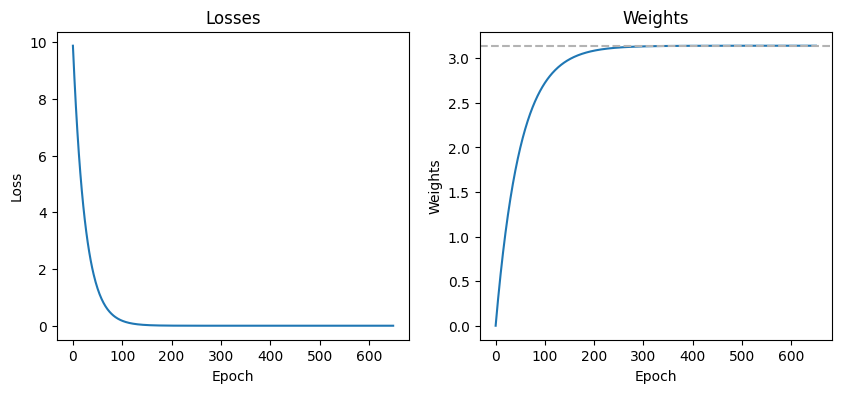

In [3]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(all_losses)
ax[0].set(title='Losses', xlabel='Epoch', ylabel='Loss')
ax[1].plot(all_weights)
ax[1].axhline(target.item(), linestyle='--', color=[.7,.7,.7], label='Target')
ax[1].set(title='Weights', xlabel='Epoch', ylabel='Weights')
plt.show()

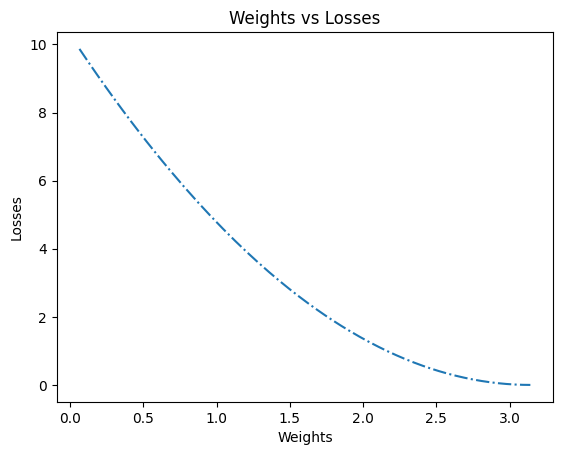

In [4]:
from matplotlib.lines import lineStyles
# plt.scatter(all_weights[1:], all_losses, marker='o')
plt.plot(all_weights[1:],all_losses,linestyle='dashdot')
plt.xlabel('Weights')
plt.ylabel('Losses')
plt.title('Weights vs Losses')
plt.show()

In [5]:
df = pd.DataFrame({'Weights': all_weights[1:], 'Losses': all_losses})
df

,Weights,Losses
0,0.062832,9.869605e+00
1,0.124407,9.478768e+00
2,0.184751,9.103410e+00
3,0.243888,8.742914e+00
4,0.301842,8.396695e+00
...,...,...
645,3.141587,4.143885e-11
646,3.141587,3.842615e-11
647,3.141587,3.552714e-11
648,3.141587,3.552714e-11


In [6]:
# Accumulate gradient on SGD and Adam and not on AdamW
def train_optim(optimizer: torch.optim, learning_rate:float, accum_grad:bool=False)->Tuple[torch.tensor]:

  if not accum_grad:
    optimizer.zero_grad(set_to_none=True)

  loss = (target - w) ** 2
  loss.backward()
  optimizer.step()

  return w.item(), loss.item()

In [7]:
optimizers_list = ['SGD','Adam','AdamW']
n_epochs = 50
learning_rate = 0.05

# Dictionaries to store results for each optimizer
all_weights_data = {}
all_losses_data = {}

# Map optimizer names to their actual classes
optimizers_map = {
    'SGD': torch.optim.SGD,
    'Adam': torch.optim.Adam,
    'AdamW': torch.optim.AdamW
}

for opt_name in optimizers_list:
  # Re-initialize the global weight for each optimizer's run
  # This ensures each optimizer starts from the same initial weight.
  global w
  w = torch.tensor([2.], requires_grad=True)
  optimizer = optimizers_map[opt_name]([w],lr=learning_rate)

  # Initialize lists for the current optimizer
  all_weights_data[opt_name] = []
  all_losses_data[opt_name] = []

  # Store the initial weight
  all_weights_data[opt_name].append(w.item())

  for epoch in range(n_epochs):
    current_w_val, current_loss_val = train_optim(optimizer,learning_rate,accum_grad=False)

    all_weights_data[opt_name].append(current_w_val)
    all_losses_data[opt_name].append(current_loss_val)

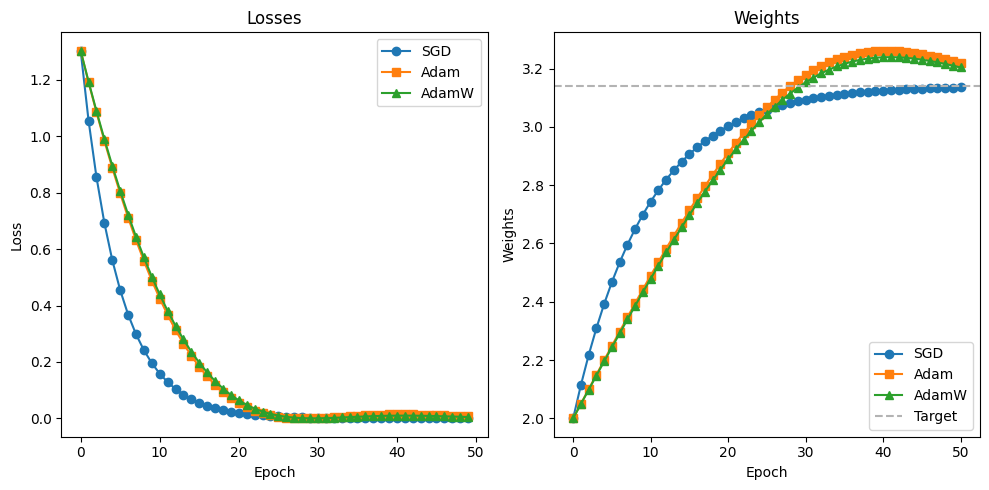

In [8]:
# Define figure dimensions for flexibility
fig_width = 10
fig_height = 5

fig, ax = plt.subplots(1, 2, figsize=(fig_width, fig_height))

linestyle_list = {'SGD':'o-',
                  'Adam': 's-',
                  'AdamW': '^-'
                  }

for opt_name in optimizers_list:
  ax[0].plot(all_losses_data[opt_name], linestyle_list[opt_name],label=opt_name)
  ax[1].plot(all_weights_data[opt_name], linestyle_list[opt_name],label=opt_name)
  ax[0].set(title='Losses', xlabel='Epoch', ylabel='Loss')
  ax[1].set(title='Weights', xlabel='Epoch', ylabel='Weights')
ax[1].axhline(target.item(), linestyle='--', color=[.7,.7,.7], label='Target')
ax[0].legend()
ax[1].legend()
plt.tight_layout() # Added for adaptive spacing
plt.show()

In [20]:
# Accumulate gradient on SGD and Adam and not on AdamW
def train_optim(optimizer: torch.optim, learning_rate:float, accum_grad:bool=False, print_grad=False)->Tuple[torch.tensor]:

  if not accum_grad:
    optimizer.zero_grad(set_to_none=True)

  loss = (target - w) ** 2
  loss.backward()

  if print_grad:
    print(f'{w.grad.item():0.3f}')

  optimizer.step()

  return w.item(), loss.item()

In [25]:
optimizers_list = ['SGD','Adam','AdamW']
n_epochs = 50
learning_rate = 0.05

# Dictionaries to store results for each optimizer
all_weights_data = {}
all_losses_data = {}

# Map optimizer names to their actual classes
optimizers_map = {
    'SGD': torch.optim.SGD,
    'Adam': torch.optim.Adam,
    'AdamW': torch.optim.AdamW
}

print_grad = False

for opt_name in optimizers_list:
  if print_grad:
    print(f'Running Optimizer: {opt_name}')
    print('*'*30)

  # Re-initialize the global weight for each optimizer's run
  # This ensures each optimizer starts from the same initial weight.
  global w
  w = torch.tensor([2.], requires_grad=True)
  optimizer = optimizers_map[opt_name]([w],lr=learning_rate)

  # Initialize lists for the current optimizer
  all_weights_data[opt_name] = []
  all_losses_data[opt_name] = []

  # Store the initial weight
  all_weights_data[opt_name].append(w.item())

  for epoch in range(n_epochs):
    if opt_name == 'AdamW':
      current_w_val, current_loss_val = train_optim(optimizer,learning_rate,accum_grad=False, print_grad=print_grad)
    else:
      current_w_val, current_loss_val = train_optim(optimizer,learning_rate,accum_grad=True, print_grad=print_grad)

    all_weights_data[opt_name].append(current_w_val)
    all_losses_data[opt_name].append(current_loss_val)

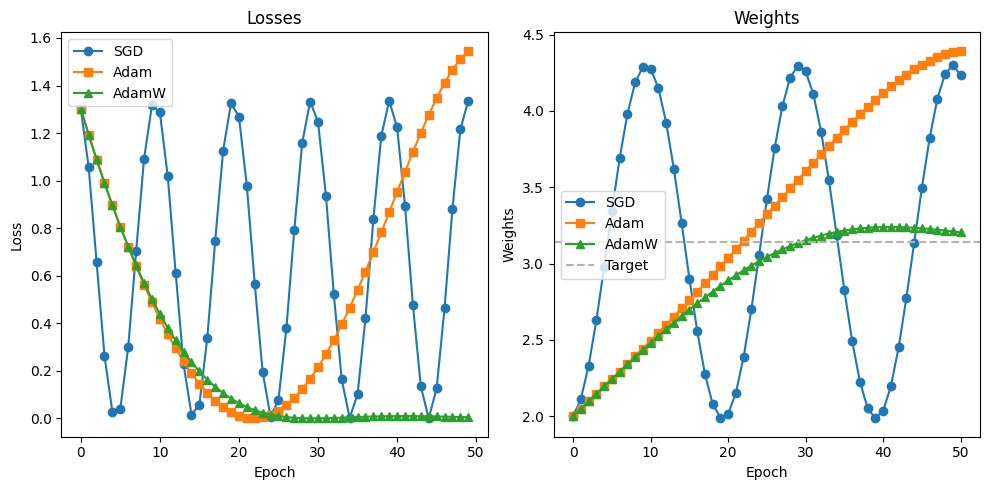

In [26]:
# Define figure dimensions for flexibility
fig_width = 10
fig_height = 5

fig, ax = plt.subplots(1, 2, figsize=(fig_width, fig_height))

linestyle_list = {'SGD':'o-',
                  'Adam': 's-',
                  'AdamW': '^-'
                  }

for opt_name in optimizers_list:
  ax[0].plot(all_losses_data[opt_name], linestyle_list[opt_name],label=opt_name)
  ax[1].plot(all_weights_data[opt_name], linestyle_list[opt_name],label=opt_name)
  ax[0].set(title='Losses', xlabel='Epoch', ylabel='Loss')
  ax[1].set(title='Weights', xlabel='Epoch', ylabel='Weights')
ax[1].axhline(target.item(), linestyle='--', color=[.7,.7,.7], label='Target')
ax[0].legend()
ax[1].legend()
plt.tight_layout() # Added for adaptive spacing
plt.show()

In [17]:
w.grad.item()

0.13709354400634766